In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# 데이터 불러오기 & 필요한 데이터 Filter

In [4]:
df = pd.read_excel('./최종 데이터 그래프그리기용.xlsx') 
print(df)

      Sample_ID GROUP  COHORT SEX  AGE     Trait FitbitOX      Fitbit_ID  HTN  \
0         S0001   SMI       2   M   60  fitbit_O        O  sevrance00001  NaN   
1         S0002   SMI       2   M   61  fitbit_O        O  sevrance00002  NaN   
2         S0003   SMI       2   F   52  fitbit_O        O  sevrance00003  NaN   
3         S0004   SMI       2   F   41  fitbit_O        O  sevrance00004  NaN   
4         S0005   SMI       2   F   41  fitbit_O        O  sevrance00005  NaN   
..          ...   ...     ...  ..  ...       ...      ...            ...  ...   
386  MetS_S0280  MetS       1   F   24  fitbit_O        O   gnfmmets+139  NaN   
387  MetS_S0281  MetS       1   F   44  fitbit_O        O   gnfmmets+140  NaN   
388  MetS_S0282  MetS       1   F   37  fitbit_O        O   gnfmmets+141  1.0   
389  MetS_S0283  MetS       1   M   51  fitbit_X        X              X  NaN   
390  MetS_S0284  MetS       1   F   42  fitbit_X        X              X  NaN   

      DM  ...  BDI_Q13_2 BD

In [5]:
cut_df=df[['Sample_ID','GROUP','COHORT','SEX','AGE','HDL_1','HDL_2','TG_1','TG_2','LDL_1','LDL_2','MD_wine_1','MD_wine_2','SMOKE_1','SMOKE_2','PSQI_TOTAL_1','PSQI_TOTAL_2']]

In [6]:
cut_df

,Sample_ID,GROUP,COHORT,SEX,AGE,HDL_1,HDL_2,TG_1,TG_2,LDL_1,LDL_2,MD_wine_1,MD_wine_2,SMOKE_1,SMOKE_2,PSQI_TOTAL_1,PSQI_TOTAL_2
0,S0001,SMI,2,M,60,61,77.0,81,75.0,111,112.0,0.0,0.0,3,3,8.0,7.0
1,S0002,SMI,2,M,61,60,59.0,106,101.0,77,77.0,0.0,1.0,2,2,4.0,8.0
2,S0003,SMI,2,F,52,40,40.0,231,183.0,155,128.0,0.0,0.0,1,1,3.0,4.0
3,S0004,SMI,2,F,41,58,54.0,94,78.0,145,119.0,0.0,0.0,1,1,6.0,6.0
4,S0005,SMI,2,F,41,81,72.0,70,42.0,123,114.0,0.0,0.0,1,1,10.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,MetS_S0280,MetS,1,F,24,61,NaN,51,NaN,120,NaN,0.0,0.0,1,1,5.0,NaN
387,MetS_S0281,MetS,1,F,44,45,NaN,104,NaN,103,NaN,0.0,0.0,1,1,3.0,NaN
388,MetS_S0282,MetS,1,F,37,53,NaN,128,NaN,82,NaN,0.0,0.0,1,1,3.0,NaN
389,MetS_S0283,MetS,1,M,51,57,NaN,163,NaN,150,NaN,0.0,0.0,1,1,5.0,NaN


In [7]:
#보조 호르몬 요법을 받고 있는 Cohort 3 제거 Filter 적용
cut_df = cut_df[(cut_df['COHORT'] != 3)]
cut_df

,Sample_ID,GROUP,COHORT,SEX,AGE,HDL_1,HDL_2,TG_1,TG_2,LDL_1,LDL_2,MD_wine_1,MD_wine_2,SMOKE_1,SMOKE_2,PSQI_TOTAL_1,PSQI_TOTAL_2
0,S0001,SMI,2,M,60,61,77.0,81,75.0,111,112.0,0.0,0.0,3,3,8.0,7.0
1,S0002,SMI,2,M,61,60,59.0,106,101.0,77,77.0,0.0,1.0,2,2,4.0,8.0
2,S0003,SMI,2,F,52,40,40.0,231,183.0,155,128.0,0.0,0.0,1,1,3.0,4.0
3,S0004,SMI,2,F,41,58,54.0,94,78.0,145,119.0,0.0,0.0,1,1,6.0,6.0
4,S0005,SMI,2,F,41,81,72.0,70,42.0,123,114.0,0.0,0.0,1,1,10.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,MetS_S0280,MetS,1,F,24,61,NaN,51,NaN,120,NaN,0.0,0.0,1,1,5.0,NaN
387,MetS_S0281,MetS,1,F,44,45,NaN,104,NaN,103,NaN,0.0,0.0,1,1,3.0,NaN
388,MetS_S0282,MetS,1,F,37,53,NaN,128,NaN,82,NaN,0.0,0.0,1,1,3.0,NaN
389,MetS_S0283,MetS,1,M,51,57,NaN,163,NaN,150,NaN,0.0,0.0,1,1,5.0,NaN


In [8]:
cut_df_n=cut_df.dropna()
cut_df_n.reset_index(drop=True, inplace=True)
cut_df_n.isnull().sum()

Sample_ID       0
GROUP           0
COHORT          0
SEX             0
AGE             0
HDL_1           0
HDL_2           0
TG_1            0
TG_2            0
LDL_1           0
LDL_2           0
MD_wine_1       0
MD_wine_2       0
SMOKE_1         0
SMOKE_2         0
PSQI_TOTAL_1    0
PSQI_TOTAL_2    0
dtype: int64

# TC 데이터 추가

In [9]:
#TC = HDL-C + LDL-C + TG/5

tc_1_list=[]
tc_2_list=[]

for index, row in cut_df_n.iterrows():

    tc_1=int(row[4])+int(row[8])+int(row[6])/5
    tc_1_list.append(tc_1)

    tc_2=int(row[5])+int(row[9])+int(row[7])/5
    tc_2_list.append(tc_2)

len(tc_1_list)

235

In [10]:
TC_df=pd.DataFrame({'TC_1':tc_1_list,'TC_2':tc_2_list})

cut_df_t=pd.concat([cut_df_n,TC_df], axis=1)

cut_df_t

,Sample_ID,GROUP,COHORT,SEX,AGE,HDL_1,HDL_2,TG_1,TG_2,LDL_1,LDL_2,MD_wine_1,MD_wine_2,SMOKE_1,SMOKE_2,PSQI_TOTAL_1,PSQI_TOTAL_2,TC_1,TC_2
0,S0001,SMI,2,M,60,61,77.0,81,75.0,111,112.0,0.0,0.0,3,3,8.0,7.0,150.4,188.2
1,S0002,SMI,2,M,61,60,59.0,106,101.0,77,77.0,0.0,1.0,2,2,4.0,8.0,173.8,158.2
2,S0003,SMI,2,F,52,40,40.0,231,183.0,155,128.0,0.0,0.0,1,1,3.0,4.0,243.0,241.2
3,S0004,SMI,2,F,41,58,54.0,94,78.0,145,119.0,0.0,0.0,1,1,6.0,6.0,129.8,221.8
4,S0005,SMI,2,F,41,81,72.0,70,42.0,123,114.0,0.0,0.0,1,1,10.0,8.0,97.4,218.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,MetS_S0217,MetS,1,F,63,55,66.0,64,46.0,65,56.0,0.0,0.0,1,1,3.0,8.0,122.2,132.8
231,MetS_S0218,MetS,1,M,57,51,51.0,62,76.0,57,66.0,0.0,0.0,1,1,4.0,3.0,143.2,120.4
232,MetS_S0220,MetS,1,F,35,58,49.0,88,91.0,94,83.0,0.0,0.0,1,1,1.0,2.0,135.8,169.6
233,MetS_S0222,MetS,1,F,61,58,60.0,65,62.0,52,53.0,0.0,0.0,1,1,8.0,7.0,135.0,123.0


# PSQI 점수와 혈중 지질 농도(TG, LDL)

In [67]:
df_psqi = cut_df_t.dropna(subset = ['PSQI_TOTAL_1','PSQI_TOTAL_2','HDL_2','TG_2','LDL_2'])
df_psqi.isnull().sum()

Sample_ID       0
GROUP           0
COHORT          0
SEX             0
AGE             0
HDL_1           0
HDL_2           0
TG_1            0
TG_2            0
LDL_1           0
LDL_2           0
MD_wine_1       0
MD_wine_2       0
SMOKE_1         0
SMOKE_2         0
PSQI_TOTAL_1    0
PSQI_TOTAL_2    0
TC_1            0
TC_2            0
dtype: int64

In [68]:
df_psqi

,Sample_ID,GROUP,COHORT,SEX,AGE,HDL_1,HDL_2,TG_1,TG_2,LDL_1,LDL_2,MD_wine_1,MD_wine_2,SMOKE_1,SMOKE_2,PSQI_TOTAL_1,PSQI_TOTAL_2,TC_1,TC_2
0,S0001,SMI,2,M,60,61,77.0,81,75.0,111,112.0,0.0,0.0,3,3,8.0,7.0,150.4,188.2
1,S0002,SMI,2,M,61,60,59.0,106,101.0,77,77.0,0.0,1.0,2,2,4.0,8.0,173.8,158.2
2,S0003,SMI,2,F,52,40,40.0,231,183.0,155,128.0,0.0,0.0,1,1,3.0,4.0,243.0,241.2
3,S0004,SMI,2,F,41,58,54.0,94,78.0,145,119.0,0.0,0.0,1,1,6.0,6.0,129.8,221.8
4,S0005,SMI,2,F,41,81,72.0,70,42.0,123,114.0,0.0,0.0,1,1,10.0,8.0,97.4,218.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,MetS_S0217,MetS,1,F,63,55,66.0,64,46.0,65,56.0,0.0,0.0,1,1,3.0,8.0,122.2,132.8
231,MetS_S0218,MetS,1,M,57,51,51.0,62,76.0,57,66.0,0.0,0.0,1,1,4.0,3.0,143.2,120.4
232,MetS_S0220,MetS,1,F,35,58,49.0,88,91.0,94,83.0,0.0,0.0,1,1,1.0,2.0,135.8,169.6
233,MetS_S0222,MetS,1,F,61,58,60.0,65,62.0,52,53.0,0.0,0.0,1,1,8.0,7.0,135.0,123.0


# 최적 절단점을 기준으로 혈중 지질 변화 확인하기 part

In [69]:
#첫 방문때 6점 이상, 두 번째 방문때 6점 미만 (8주간 수면의 질 개선 데이터)
df_psqi_good = df_psqi[(df_psqi['PSQI_TOTAL_1'] >= 6.0) & (df_psqi['PSQI_TOTAL_2'] < 6.0)] 
df_psqi_good

,Sample_ID,GROUP,COHORT,SEX,AGE,HDL_1,HDL_2,TG_1,TG_2,LDL_1,LDL_2,MD_wine_1,MD_wine_2,SMOKE_1,SMOKE_2,PSQI_TOTAL_1,PSQI_TOTAL_2,TC_1,TC_2
25,M0003,SMI,2,F,62,56,56.0,94,80.0,140,137.0,0.0,0.0,1,1,14.0,3.0,153.2,214.8
29,M0007,SMI,2,F,56,80,77.0,99,135.0,148,126.0,0.0,0.0,1,1,7.0,5.0,206.4,247.8
32,M0010,SMI,2,M,66,48,45.0,73,70.0,173,89.0,0.0,0.0,1,1,6.0,5.0,145.0,235.6
65,MetS_S0035,MetS,1,F,20,85,78.0,72,57.0,121,129.0,0.0,0.0,1,1,6.0,5.0,92.6,220.4
69,MetS_S0039,MetS,1,F,22,79,79.0,114,64.0,98,92.0,0.0,0.0,1,1,6.0,5.0,101.8,199.8
82,MetS_S0055,MetS,1,M,35,53,50.0,91,98.0,90,113.0,0.0,0.0,1,1,11.0,5.0,143.0,161.2
88,MetS_S0062,MetS,1,M,31,61,45.0,115,187.0,118,107.0,0.0,0.0,1,1,8.0,3.0,227.0,202.0
95,MetS_S0071,MetS,1,M,38,52,48.0,129,173.0,193,176.0,0.0,0.0,1,1,9.0,5.0,220.6,270.8
97,MetS_S0073,MetS,1,M,35,42,41.0,61,112.0,136,139.0,0.0,0.0,1,1,6.0,4.0,155.2,190.2
100,MetS_S0076,MetS,1,F,25,57,51.0,93,72.0,87,92.0,0.0,0.0,1,1,8.0,4.0,107.2,162.6


In [70]:
#첫 방문때 6점 미만, 두 번째 방문때 6점 이상 (8주간 수면의 질 저하 데이터)
df_psqi_bad = df_psqi[(df_psqi['PSQI_TOTAL_1'] < 6.0) & (df_psqi['PSQI_TOTAL_2'] >= 6.0)] 
df_psqi_bad

,Sample_ID,GROUP,COHORT,SEX,AGE,HDL_1,HDL_2,TG_1,TG_2,LDL_1,LDL_2,MD_wine_1,MD_wine_2,SMOKE_1,SMOKE_2,PSQI_TOTAL_1,PSQI_TOTAL_2,TC_1,TC_2
1,S0002,SMI,2,M,61,60,59.0,106,101.0,77,77.0,0.0,1.0,2,2,4.0,8.0,173.8,158.2
20,S0021,SMI,2,M,65,44,43.0,155,117.0,96,89.0,0.0,0.0,2,2,5.0,11.0,190.6,171.0
33,M0011,SMI,2,F,66,48,53.0,166,113.0,127,128.0,0.0,0.0,1,1,5.0,8.0,189.6,208.2
51,MetS_S0018,MetS,1,M,38,50,53.0,86,88.0,102,91.0,0.0,0.0,1,1,4.0,8.0,136.6,169.2
72,MetS_S0044,MetS,1,M,28,73,68.0,123,136.0,112,115.0,0.0,0.0,3,3,5.0,6.0,177.6,209.6
80,MetS_S0053,MetS,1,M,26,72,81.0,82,49.0,102,87.0,0.0,0.0,1,1,5.0,6.0,91.2,190.4
81,MetS_S0054,MetS,1,M,36,53,50.0,68,142.0,132,140.0,0.0,0.0,1,1,5.0,7.0,188.0,198.6
85,MetS_S0058,MetS,1,F,29,86,82.0,67,53.0,112,97.0,0.0,0.0,1,1,4.0,6.0,98.4,211.4
90,MetS_S0065,MetS,1,M,30,50,45.0,176,177.0,151,149.0,0.0,0.0,1,1,3.0,6.0,216.0,236.2
98,MetS_S0074,MetS,1,F,28,67,64.0,66,56.0,121,115.0,0.0,0.0,1,1,5.0,9.0,96.8,201.2


In [71]:
#첫 방문때 6점 미만, 두 번째 방문때 6점 미만 (8주간 수면의 질 계속 정상적인 데이터)
df_psqi_normal = df_psqi[(df_psqi['PSQI_TOTAL_1'] < 6.0) & (df_psqi['PSQI_TOTAL_2'] < 6.0)] 
df_psqi_normal

,Sample_ID,GROUP,COHORT,SEX,AGE,HDL_1,HDL_2,TG_1,TG_2,LDL_1,LDL_2,MD_wine_1,MD_wine_2,SMOKE_1,SMOKE_2,PSQI_TOTAL_1,PSQI_TOTAL_2,TC_1,TC_2
2,S0003,SMI,2,F,52,40,40.0,231,183.0,155,128.0,0.0,0.0,1,1,3.0,4.0,243.0,241.2
5,S0006,SMI,2,F,58,57,47.0,119,79.0,218,109.0,0.0,0.0,1,1,4.0,4.0,146.4,298.8
9,S0010,SMI,2,F,43,58,70.0,86,82.0,83,95.0,0.0,0.0,1,1,4.0,4.0,139.0,158.2
14,S0015,SMI,2,M,65,68,77.0,66,61.0,89,76.0,0.0,0.0,3,3,4.0,4.0,141.4,170.2
15,S0016,SMI,2,F,61,45,54.0,92,147.0,87,100.0,0.0,0.0,1,1,4.0,4.0,218.8,150.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,MetS_S0206,MetS,1,F,26,58,44.0,72,104.0,130,132.0,0.0,0.0,1,1,4.0,4.0,138.8,202.4
223,MetS_S0208,MetS,1,F,30,57,58.0,69,88.0,64,109.0,0.0,0.0,1,1,3.0,4.0,129.6,134.8
231,MetS_S0218,MetS,1,M,57,51,51.0,62,76.0,57,66.0,0.0,0.0,1,1,4.0,3.0,143.2,120.4
232,MetS_S0220,MetS,1,F,35,58,49.0,88,91.0,94,83.0,0.0,0.0,1,1,1.0,2.0,135.8,169.6


In [72]:
#첫 방문때 6점 이상, 두 번째 방문때 6점 이상 (8주간 수면의 질 계속 비정상적인 데이터)
df_psqi_abnormal = df_psqi[(df_psqi['PSQI_TOTAL_1'] >= 6.0) & (df_psqi['PSQI_TOTAL_2'] >= 6.0)] 
df_psqi_abnormal

,Sample_ID,GROUP,COHORT,SEX,AGE,HDL_1,HDL_2,TG_1,TG_2,LDL_1,LDL_2,MD_wine_1,MD_wine_2,SMOKE_1,SMOKE_2,PSQI_TOTAL_1,PSQI_TOTAL_2,TC_1,TC_2
0,S0001,SMI,2,M,60,61,77.0,81,75.0,111,112.0,0.0,0.0,3,3,8.0,7.0,150.4,188.2
3,S0004,SMI,2,F,41,58,54.0,94,78.0,145,119.0,0.0,0.0,1,1,6.0,6.0,129.8,221.8
4,S0005,SMI,2,F,41,81,72.0,70,42.0,123,114.0,0.0,0.0,1,1,10.0,8.0,97.4,218.0
6,S0007,SMI,2,M,67,67,67.0,57,47.0,87,88.0,0.0,0.0,1,1,14.0,13.0,127.4,165.4
7,S0008,SMI,2,M,56,59,51.0,201,121.0,122,69.0,0.0,0.0,1,1,10.0,10.0,187.2,221.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,MetS_S0209,MetS,1,F,29,88,80.0,129,125.0,63,57.0,0.0,0.0,1,1,9.0,8.0,170.0,176.8
225,MetS_S0211,MetS,1,F,25,49,47.0,47,61.0,115,114.0,0.0,0.0,1,1,9.0,7.0,95.4,173.4
226,MetS_S0213,MetS,1,F,52,52,50.0,92,82.0,133,129.0,0.0,0.0,1,1,7.0,11.0,144.0,203.4
228,MetS_S0215,MetS,1,F,54,62,67.0,137,121.0,122,146.0,0.0,0.0,1,1,11.0,13.0,188.4,211.4


In [73]:
print(len(df_psqi_good),len(df_psqi_bad), len(df_psqi_normal), len(df_psqi_abnormal))
print(len(df_psqi_good)+len(df_psqi_bad)+len(df_psqi_normal)+len(df_psqi_abnormal))
print(len(df_psqi))

32 27 114 62
235
235


# PSQI GOOD,BAD, NORMAL, ABNORMAL 분석

In [74]:
#Filter 적용
df_psqi_good = df_psqi_good[(df_psqi_good['TG_1'] <= 300) & (df_psqi_good['TG_2'] <= 300) & (df_psqi_good['LDL_1'] <= 300) & (df_psqi_good['LDL_2'] <= 300)]
df_psqi_bad = df_psqi_bad[(df_psqi_bad['TG_1'] <= 300) & (df_psqi_bad['TG_2'] <= 300) & (df_psqi_bad['LDL_1'] <= 300) & (df_psqi_bad['LDL_2'] <= 300)]
df_psqi_normal = df_psqi_normal[(df_psqi_normal['TG_1'] <= 300) & (df_psqi_normal['TG_2'] <= 300) & (df_psqi_normal['LDL_1'] <= 300) & (df_psqi_normal['LDL_2'] <= 300)]
df_psqi_abnormal = df_psqi_abnormal[(df_psqi_abnormal['TG_1'] <= 300) & (df_psqi_abnormal['TG_2'] <= 300) & (df_psqi_abnormal['LDL_1'] <= 300) & (df_psqi_abnormal['LDL_2'] <= 300)]

#PSQI 점수 변화 별 새로운 pd 생성
good_pd = {
    'Sample_ID' : [],
    'GROUP' : [],
    'SEX' : [],
    'AGE' : [],
    'HDL' : [],
    'TG' : [],
    'LDL' : [],
    'PSQI_TOTAL' : []
}

bad_pd = {
    'Sample_ID' : [],
    'GROUP' : [],
    'SEX' : [],
    'AGE' : [],
    'HDL' : [],
    'TG' : [],
    'LDL' : [],
    'PSQI_TOTAL' : []
}

normal_pd = {
    'Sample_ID' : [],
    'GROUP' : [],
    'SEX' : [],
    'AGE' : [],
    'HDL' : [],
    'TG' : [],
    'LDL' : [],
    'PSQI_TOTAL' : []
}

abnormal_pd = {
    'Sample_ID' : [],
    'GROUP' : [],
    'SEX' : [],
    'AGE' : [],
    'HDL' : [],
    'TG' : [],
    'LDL' : [],
    'PSQI_TOTAL' : []
}

good_pd = pd.DataFrame(good_pd)
bad_pd = pd.DataFrame(bad_pd)
normal_pd = pd.DataFrame(normal_pd)
abnormal_pd = pd.DataFrame(abnormal_pd)

In [75]:
#good_pd 생성
for index, row in df_psqi_good.iterrows():

    HDL=int(row[5])-int(row[6])
    TG=int(row[7])-int(row[8])
    LDL=int(row[9])-int(row[10])
    PSQI=int(row[15])-int(row[16])
    
    #데이터 추가
    good_pd.loc[len(good_pd)] = [row[0],row[1],row[3],row[4],HDL,TG,LDL,PSQI]
    
good_pd

,Sample_ID,GROUP,SEX,AGE,HDL,TG,LDL,PSQI_TOTAL
0,M0003,SMI,F,62.0,0.0,14.0,3.0,11.0
1,M0007,SMI,F,56.0,3.0,-36.0,22.0,2.0
2,M0010,SMI,M,66.0,3.0,3.0,84.0,1.0
3,MetS_S0035,MetS,F,20.0,7.0,15.0,-8.0,1.0
4,MetS_S0039,MetS,F,22.0,0.0,50.0,6.0,1.0
5,MetS_S0055,MetS,M,35.0,3.0,-7.0,-23.0,6.0
6,MetS_S0062,MetS,M,31.0,16.0,-72.0,11.0,5.0
7,MetS_S0071,MetS,M,38.0,4.0,-44.0,17.0,4.0
8,MetS_S0073,MetS,M,35.0,1.0,-51.0,-3.0,2.0
9,MetS_S0076,MetS,F,25.0,6.0,21.0,-5.0,4.0


In [76]:
#bad_pd 생성
for index, row in df_psqi_bad.iterrows():

    HDL=int(row[5])-int(row[6])
    TG=int(row[7])-int(row[8])
    LDL=int(row[9])-int(row[10])
    PSQI=int(row[15])-int(row[16])
    
    #데이터 추가
    bad_pd.loc[len(bad_pd)] = [row[0],row[1],row[3],row[4],HDL,TG,LDL,PSQI]
    
bad_pd

,Sample_ID,GROUP,SEX,AGE,HDL,TG,LDL,PSQI_TOTAL
0,S0002,SMI,M,61.0,1.0,5.0,0.0,-4.0
1,S0021,SMI,M,65.0,1.0,38.0,7.0,-6.0
2,M0011,SMI,F,66.0,-5.0,53.0,-1.0,-3.0
3,MetS_S0018,MetS,M,38.0,-3.0,-2.0,11.0,-4.0
4,MetS_S0044,MetS,M,28.0,5.0,-13.0,-3.0,-1.0
5,MetS_S0053,MetS,M,26.0,-9.0,33.0,15.0,-1.0
6,MetS_S0054,MetS,M,36.0,3.0,-74.0,-8.0,-2.0
7,MetS_S0058,MetS,F,29.0,4.0,14.0,15.0,-2.0
8,MetS_S0065,MetS,M,30.0,5.0,-1.0,2.0,-3.0
9,MetS_S0074,MetS,F,28.0,3.0,10.0,6.0,-4.0


In [77]:
#normal_pd 생성
for index, row in df_psqi_normal.iterrows():

    HDL=int(row[5])-int(row[6])
    TG=int(row[7])-int(row[8])
    LDL=int(row[9])-int(row[10])
    PSQI=int(row[15])-int(row[16])
    
    #데이터 추가
    normal_pd.loc[len(normal_pd)] = [row[0],row[1],row[3],row[4],HDL,TG,LDL,PSQI]
    
normal_pd

,Sample_ID,GROUP,SEX,AGE,HDL,TG,LDL,PSQI_TOTAL
0,S0003,SMI,F,52.0,0.0,48.0,27.0,-1.0
1,S0006,SMI,F,58.0,10.0,40.0,109.0,0.0
2,S0010,SMI,F,43.0,-12.0,4.0,-12.0,0.0
3,S0015,SMI,M,65.0,-9.0,5.0,13.0,0.0
4,S0016,SMI,F,61.0,-9.0,-55.0,-13.0,0.0
...,...,...,...,...,...,...,...,...
107,MetS_S0206,MetS,F,26.0,14.0,-32.0,-2.0,0.0
108,MetS_S0208,MetS,F,30.0,-1.0,-19.0,-45.0,-1.0
109,MetS_S0218,MetS,M,57.0,0.0,-14.0,-9.0,1.0
110,MetS_S0220,MetS,F,35.0,9.0,-3.0,11.0,-1.0


In [78]:
#abnormal_pd 생성
for index, row in df_psqi_abnormal.iterrows():

    HDL=int(row[5])-int(row[6])
    TG=int(row[7])-int(row[8])
    LDL=int(row[9])-int(row[10])
    PSQI=int(row[15])-int(row[16])
    
    #데이터 추가
    abnormal_pd.loc[len(abnormal_pd)] = [row[0],row[1],row[3],row[4],HDL,TG,LDL,PSQI]
    
abnormal_pd

,Sample_ID,GROUP,SEX,AGE,HDL,TG,LDL,PSQI_TOTAL
0,S0001,SMI,M,60.0,-16.0,6.0,-1.0,1.0
1,S0004,SMI,F,41.0,4.0,16.0,26.0,0.0
2,S0005,SMI,F,41.0,9.0,28.0,9.0,2.0
3,S0007,SMI,M,67.0,0.0,10.0,-1.0,1.0
4,S0008,SMI,M,56.0,8.0,80.0,53.0,0.0
5,S0009,SMI,F,58.0,-1.0,127.0,-12.0,0.0
6,S0011,SMI,F,48.0,9.0,-28.0,17.0,-1.0
7,S0012,SMI,F,68.0,-2.0,-22.0,-8.0,2.0
8,S0013,SMI,F,57.0,-1.0,17.0,9.0,-1.0
9,S0014,SMI,F,60.0,5.0,9.0,19.0,0.0


In [79]:
#good의 혈중 지질 농도 평균 변화
good_psqi_tg_mean = good_pd['TG'].mean()
good_psqi_ldl_mean = good_pd['LDL'].mean()
good_psqi_psqi = good_pd['PSQI_TOTAL'].mean()

print(good_psqi_tg_mean, good_psqi_ldl_mean, good_psqi_psqi)

-7.733333333333333 5.033333333333333 3.6


In [80]:
#bad의 혈중 지질 농도 평균 변화
bad_psqi_tg_mean = bad_pd['TG'].mean()
bad_psqi_ldl_mean = bad_pd['LDL'].mean()
bad_psqi_psqi = bad_pd['PSQI_TOTAL'].mean()

print(bad_psqi_tg_mean, bad_psqi_ldl_mean, bad_psqi_psqi)

10.962962962962964 10.407407407407407 -2.962962962962963


In [81]:
#normal의 혈중 지질 농도 평균 변화
normal_psqi_tg_mean = normal_pd['TG'].mean()
normal_psqi_ldl_mean = normal_pd['LDL'].mean()
normal_psqi_psqi = normal_pd['PSQI_TOTAL'].mean()

print(normal_psqi_tg_mean, normal_psqi_ldl_mean, normal_psqi_psqi)

-3.3125 1.9196428571428572 0.03571428571428571


In [82]:
#abnormal의 혈중 지질 농도 평균 변화
abnormal_psqi_tg_mean = abnormal_pd['TG'].mean()
abnormal_psqi_ldl_mean = abnormal_pd['LDL'].mean()
abnormal_psqi_psqi = abnormal_pd['PSQI_TOTAL'].mean()

print(abnormal_psqi_tg_mean, abnormal_psqi_ldl_mean, abnormal_psqi_psqi)

5.766666666666667 7.116666666666666 0.13333333333333333


In [83]:
good_pd['PSQI_TOTAL'].value_counts()

2.0     8
4.0     7
1.0     4
3.0     3
5.0     3
6.0     3
7.0     1
11.0    1
Name: PSQI_TOTAL, dtype: int64

In [84]:
bad_pd['PSQI_TOTAL'].value_counts()

-3.0    12
-2.0     5
-4.0     5
-1.0     3
-5.0     1
-6.0     1
Name: PSQI_TOTAL, dtype: int64

In [85]:
normal_pd['PSQI_TOTAL'].value_counts()

 0.0    37
 1.0    24
-1.0    16
-2.0    15
 2.0    11
 3.0     4
-3.0     4
 4.0     1
Name: PSQI_TOTAL, dtype: int64

In [86]:
abnormal_pd['PSQI_TOTAL'].value_counts()

 0.0    11
 1.0    11
-2.0     8
-1.0     7
 2.0     7
 3.0     6
-5.0     3
-4.0     2
 6.0     2
-6.0     1
-3.0     1
 8.0     1
Name: PSQI_TOTAL, dtype: int64

#cohort3 포함
#10개 이하 데이터 제거
change_pd = change_pd[(change_pd['PSQI_TOTAL'] < 5.0) & (change_pd['PSQI_TOTAL'] > -4.0)]
change_pd['PSQI_TOTAL'].value_counts()

In [87]:
#새로운 변화 표 생성
good_psqi_tg = pd.DataFrame(good_pd.groupby(['PSQI_TOTAL']).TG.mean())
#good_psqi_ldl = pd.DataFrame(good_pd.groupby(['PSQI_TOTAL']).LDL.mean())

#good_psqi=pd.concat([good_psqi_tg, good_psqi_ldl],axis=1)
good_psqi=good_psqi_tg
good_psqi

,TG
PSQI_TOTAL,
1.0,-13.000000
2.0,2.000000
3.0,-68.333333
4.0,-2.285714
5.0,-41.333333
6.0,36.666667
7.0,25.000000
11.0,14.000000


In [88]:
#새로운 변화 표 생성
bad_psqi_tg = pd.DataFrame(bad_pd.groupby(['PSQI_TOTAL']).TG.mean())
#bad_psqi_ldl = pd.DataFrame(bad_pd.groupby(['PSQI_TOTAL']).LDL.mean())

#bad_psqi=pd.concat([bad_psqi_tg, bad_psqi_ldl],axis=1)
bad_psqi=bad_psqi_tg
bad_psqi

,TG
PSQI_TOTAL,
-6.0,38.000000
-5.0,18.000000
-4.0,14.000000
-3.0,5.750000
-2.0,-8.200000
-1.0,47.333333


In [89]:
#새로운 변화 표 생성
normal_psqi_tg = pd.DataFrame(normal_pd.groupby(['PSQI_TOTAL']).TG.mean())

normal_psqi=normal_psqi_tg
normal_psqi

,TG
PSQI_TOTAL,
-3.0,-15.500000
-2.0,-6.066667
-1.0,-4.500000
0.0,-3.513514
1.0,0.791667
2.0,-8.909091
3.0,23.000000
4.0,-29.000000


In [100]:
#새로운 변화 표 생성
abnormal_psqi_tg = pd.DataFrame(abnormal_pd.groupby(['PSQI_TOTAL']).TG.mean())

abnormal_psqi=abnormal_psqi_tg
abnormal_psqi

,TG
PSQI_TOTAL,
-6.0,-45.000000
-5.0,15.666667
-4.0,6.000000
-3.0,-15.000000
-2.0,-2.375000
-1.0,10.857143
0.0,26.636364
1.0,-13.090909
2.0,9.142857


In [102]:
#그래프에서 한글 출력 시 폰트 변경(기본폰트: sans-serif)
plt.rcParams['font.family'] = 'Malgun Gothic'
# 그래프에서 마이너스(-) 폰트 깨짐 방지
plt.rcParams['axes.unicode_minus']=False

In [98]:
sns.set(style="darkgrid")

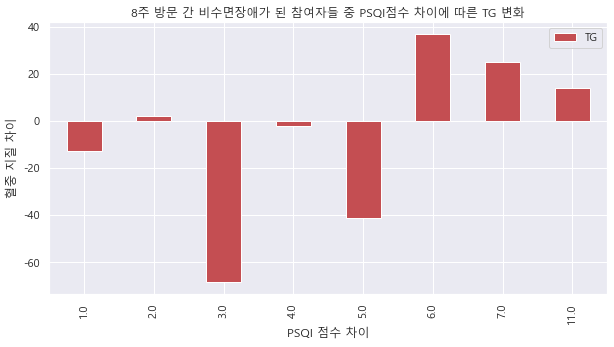

In [103]:
good_psqi_lipids_bar=good_psqi.plot.bar(color=['r','c'],title='8주 방문 간 비수면장애가 된 참여자들 중 PSQI점수 차이에 따른 TG 변화')
good_psqi_lipids_bar.set_xlabel('PSQI 점수 차이')
good_psqi_lipids_bar.set_ylabel('혈중 지질 차이')
plt.rcParams['figure.figsize'] = [10, 5] # [width, height] (inches)
plt.show()

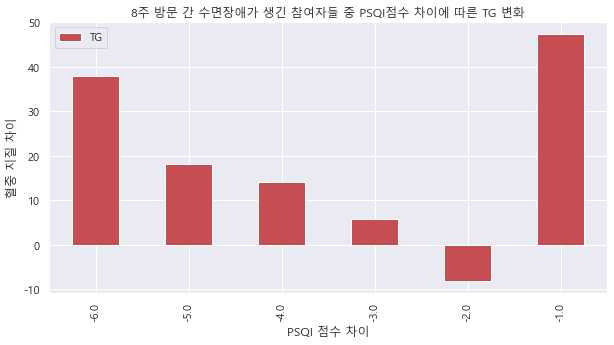

In [104]:
bad_psqi_lipids_bar=bad_psqi.plot.bar(color=['r','c'],title='8주 방문 간 수면장애가 생긴 참여자들 중 PSQI점수 차이에 따른 TG 변화')
bad_psqi_lipids_bar.set_xlabel('PSQI 점수 차이')
bad_psqi_lipids_bar.set_ylabel('혈중 지질 차이')
plt.rcParams['figure.figsize'] = [10, 5] # [width, height] (inches)
plt.show()

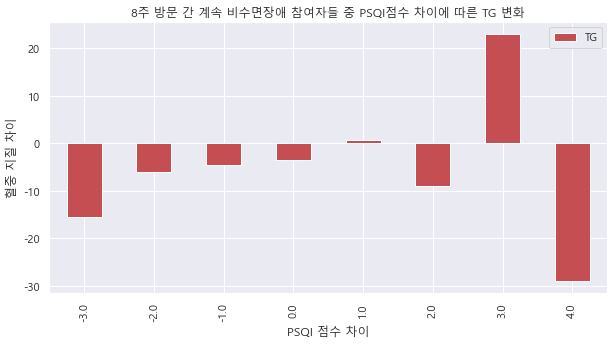

In [105]:
normal_psqi_lipids_bar=normal_psqi.plot.bar(color=['r','c'],title='8주 방문 간 계속 비수면장애 참여자들 중 PSQI점수 차이에 따른 TG 변화')
normal_psqi_lipids_bar.set_xlabel('PSQI 점수 차이')
normal_psqi_lipids_bar.set_ylabel('혈중 지질 차이')
plt.rcParams['figure.figsize'] = [10, 5] # [width, height] (inches)
plt.show()

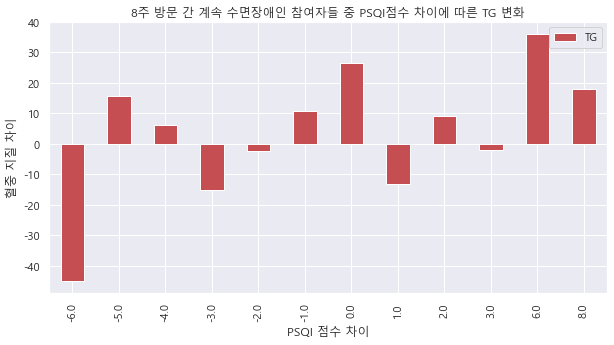

In [106]:
abnormal_psqi_lipids_bar=abnormal_psqi.plot.bar(color=['r','c'],title='8주 방문 간 계속 수면장애인 참여자들 중 PSQI점수 차이에 따른 TG 변화')
abnormal_psqi_lipids_bar.set_xlabel('PSQI 점수 차이')
abnormal_psqi_lipids_bar.set_ylabel('혈중 지질 차이')
plt.rcParams['figure.figsize'] = [10, 5] # [width, height] (inches)
plt.show()